## DS5559 - Project
## Notebook 4 - PCA
#### Name: Mengyao Zhang (mz6jv), Runhao Zhao (rz6dg)

#### This notebook runs PCA using CHAPS as BAG

# Configuration

In [2]:
db_name = 'project.db'
#db_name2 = 'tfidf_small.db'

In [3]:
OHCO = ['book_num','chap_num', 'para_num', 'sent_num', 'token_num']
BOOKS = OHCO[:1] 
CHAPS = OHCO[:2]
PARAS = OHCO[:3]
SENTS = OHCO[:4]
#BAG = PARAS 
BAG = CHAPS

# Libraries

In [4]:
import sqlite3
import pandas as pd
import numpy as np

from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Pragmas

In [44]:
%matplotlib inline

In [58]:
#%matplotlib notebook

# Process

## Import data

In [5]:
with sqlite3.connect(db_name) as db:
    bags_meta = pd.read_sql("SELECT * FROM bag", db, index_col='bag_id')    
    vocab = pd.read_sql("select * from vocab", db, index_col='term_id')
    TFIDF = pd.read_sql("SELECT * FROM tfidf_small", db, index_col=BAG)

In [6]:
# read in tfidf_small
# with sqlite3.connect(db_name2) as db2:
#     TFIDF = pd.read_sql("SELECT * FROM tfidf_small", db2, index_col=BAG)

In [5]:
TFIDF.head() 

95  150  162       296  382       415       417  \
book_num chap_num                                                          
1        0         0.000000  0.0  0.0  0.037412  0.0  0.000000  0.046796   
         1         0.000000  0.0  0.0  0.027259  0.0  0.034097  0.000000   
         2         0.019922  0.0  0.0  0.000000  0.0  0.000000  0.000000   
         3         0.000000  0.0  0.0  0.014575  0.0  0.036462  0.000000   
         4         0.000000  0.0  0.0  0.000000  0.0  0.000000  0.000000   

                        420  447       461  ...       44700  44804  44819  \
book_num chap_num                           ...                             
1        0         0.000000  0.0  0.000000  ...    0.000000    0.0    0.0   
         1         0.000000  0.0  0.027512  ...    0.000000    0.0    0.0   
         2         0.000000  0.0  0.043675  ...    0.000000    0.0    0.0   
         3         0.020038  0.0  0.000000  ...    0.019656    0.0    0.0   
         4         0.039071  0.0  0.028683  ...    0.000000    0.0    0.0   

                      44825     44833     44857     44860     44864     44911  \
book_num chap_num                                                               
1        0         0.000000  0.098101  0.000000  0.000000  0.047139  0.025306   
         1         0.000000  0.047653  0.020395  0.000000  0.051520  0.036877   
         2         0.022621  0.018912  0.064753  0.030207  0.054525  0.043907   
         3         0.000000  0.025479  0.010905  0.000000  0.009182  0.039435   
         4         0.000000  0.024841  0.042525  0.000000  0.035808  0.019223   

                   44929  
book_num chap_num         
1        0           0.0  
         1           0.0  
         2           0.0  
         3           0.0  
         4           0.0  

[5 rows x 984 columns]

In [6]:
TFIDF.shape

(1593, 984)

In [7]:
vocab_idx = TFIDF.columns

In [8]:
vocab_idx

Index(['95', '150', '162', '296', '382', '415', '417', '420', '447', '461',
       ...
       '44700', '44804', '44819', '44825', '44833', '44857', '44860', '44864',
       '44911', '44929'],
      dtype='object', length=984)

## Run PCA

In [9]:
pca = PCA(n_components=50)
projected = pca.fit_transform(normalize(TFIDF.values, norm='l2'))

In [10]:
np.cumsum(pca.explained_variance_ratio_)

array([0.04276877, 0.07855374, 0.09948357, 0.11798683, 0.13534527,
       0.15099047, 0.16483513, 0.17729462, 0.18937342, 0.20032279,
       0.2109118 , 0.22114568, 0.23093235, 0.24020277, 0.24835774,
       0.25626349, 0.26355679, 0.27061241, 0.27723912, 0.2835201 ,
       0.28969662, 0.29538379, 0.30079101, 0.30600318, 0.31115367,
       0.31596403, 0.32069073, 0.32538208, 0.32983221, 0.33423486,
       0.33843796, 0.34262433, 0.34673036, 0.35076114, 0.35469183,
       0.35850026, 0.36226776, 0.36601825, 0.36966348, 0.37323047,
       0.37663007, 0.38000218, 0.3833114 , 0.38657692, 0.38979515,
       0.39295565, 0.39607761, 0.39909671, 0.40210892, 0.40507852])

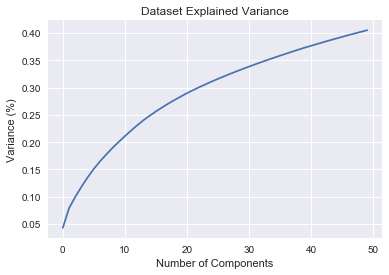

In [11]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [12]:
projected.shape

(1593, 50)

In [13]:
bags_meta.head() 
# can't directly use bags_meta b/c num of chaps reduced to 1593 when creating tfidf_small (only using top 1000 terms)

,book_num,chap_num,para_num,title,author,publication_year,gender
bag_id,,,,,,,
0,1,0,0,Jane_Eyre,Charlotte_Bronte,1847,female
1,1,0,1,Jane_Eyre,Charlotte_Bronte,1847,female
2,1,0,2,Jane_Eyre,Charlotte_Bronte,1847,female
3,1,0,3,Jane_Eyre,Charlotte_Bronte,1847,female
4,1,0,4,Jane_Eyre,Charlotte_Bronte,1847,female


In [14]:
bags_meta.shape

(108658, 7)

In [142]:
# add gender info to bags_meta --- already added to database, no need to run again
'''
F_list = list(range(1,19))
F_list.append(20)
M_list = list(range(21,31))
M_list.append(19)

bags_meta['gender'] = np.where(bags_meta['book_num'].isin(F_list), 'female', 'male')
'''

In [15]:
bags_meta.tail()

,book_num,chap_num,para_num,title,author,publication_year,gender
bag_id,,,,,,,
108653,30,67,62,Our_Mutual_Friend,Charles_Dickens,1865,male
108654,30,67,63,Our_Mutual_Friend,Charles_Dickens,1865,male
108655,30,67,64,Our_Mutual_Friend,Charles_Dickens,1865,male
108656,30,67,65,Our_Mutual_Friend,Charles_Dickens,1865,male
108657,30,67,66,Our_Mutual_Friend,Charles_Dickens,1865,male


In [147]:
# update the database
'''
with sqlite3.connect(db_name) as db:
    bags_meta.to_sql('bag', db, if_exists='replace', index=True)
'''

### Define labels

#### Use book_ids as label

In [16]:
books = TFIDF.reset_index().book_num
books_list = books.unique().tolist()
book_ids = books.apply(lambda x: books_list.index(x)).values

In [17]:
len(books)

1593

In [18]:
book_ids

array([ 0,  0,  0, ..., 29, 29, 29], dtype=int64)

#### Use author_ids as label

In [19]:
# since tfidf_small has less num of chapters than original, create bags_meta_new
bags_meta_new = bags_meta.drop_duplicates(['book_num','chap_num'])

In [20]:
bags_meta_new.head()

,book_num,chap_num,para_num,title,author,publication_year,gender
bag_id,,,,,,,
0,1,0,0,Jane_Eyre,Charlotte_Bronte,1847,female
44,1,1,0,Jane_Eyre,Charlotte_Bronte,1847,female
88,1,2,0,Jane_Eyre,Charlotte_Bronte,1847,female
178,1,3,0,Jane_Eyre,Charlotte_Bronte,1847,female
303,1,4,0,Jane_Eyre,Charlotte_Bronte,1847,female


In [21]:
bags_meta_new.shape # more chaps than in tfidf_small

(1622, 7)

In [22]:
tfidf_idx = TFIDF.reset_index()[['book_num','chap_num']]

In [23]:
tfidf_idx.head()

,book_num,chap_num
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4


In [24]:
tfidf_idx.shape

(1593, 2)

In [25]:
# new_df showing the metadata for chaps in tfidf_small
new_df = tfidf_idx.merge(bags_meta_new,how="left",on=['book_num','chap_num']).drop('para_num',1)

In [26]:
new_df.head()

,book_num,chap_num,title,author,publication_year,gender
0,1,0,Jane_Eyre,Charlotte_Bronte,1847,female
1,1,1,Jane_Eyre,Charlotte_Bronte,1847,female
2,1,2,Jane_Eyre,Charlotte_Bronte,1847,female
3,1,3,Jane_Eyre,Charlotte_Bronte,1847,female
4,1,4,Jane_Eyre,Charlotte_Bronte,1847,female


In [27]:
new_df.shape

(1593, 6)

In [28]:
authors = new_df.author
author_list = authors.unique().tolist()
author_ids = authors.apply(lambda x: author_list.index(x)).values

In [29]:
author_list

['Charlotte_Bronte',
 'Emily_Bronte',
 'Anne_Bronte',
 'Jane_Austen',
 'Elizabeth_Cleghorn_Gaskell',
 'George_Eliot',
 'Anthony_Trollope',
 'Frances_Burney',
 'Charles_Dickens']

In [30]:
np.unique(author_ids)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [31]:
author_ids

array([0, 0, 0, ..., 8, 8, 8], dtype=int64)

In [32]:
author_name = new_df.author.values

In [33]:
author_name

array(['Charlotte_Bronte', 'Charlotte_Bronte', 'Charlotte_Bronte', ...,
       'Charles_Dickens', 'Charles_Dickens', 'Charles_Dickens'],
      dtype=object)

In [34]:
len(author_name)

1593

In [35]:
# create a dictionary for author_id and corresponding author name
author_dic = dict(zip(list(np.unique(author_ids)), author_list))

In [36]:
author_dic

{0: 'Charlotte_Bronte',
 1: 'Emily_Bronte',
 2: 'Anne_Bronte',
 3: 'Jane_Austen',
 4: 'Elizabeth_Cleghorn_Gaskell',
 5: 'George_Eliot',
 6: 'Anthony_Trollope',
 7: 'Frances_Burney',
 8: 'Charles_Dickens'}

#### Use gender_ids as label

In [37]:
genders = new_df.gender
gender_list = genders.unique().tolist()
gender_ids = genders.apply(lambda x: gender_list.index(x)).values

In [38]:
gender_list

['female', 'male']

In [39]:
gender_ids

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### Define functions

In [40]:
# plot PCA using matplotlib
def plot_pca(subspace, labels, pc_x = 0, pc_y = 1, figsize=(15, 10), annotate=False,category='book_num'):
    plt.figure(figsize=figsize)
    plt.scatter(projected[:, pc_x], 
                projected[:, pc_y],
                c=labels, 
                edgecolor='none', 
                alpha=0.5,
                cmap=plt.cm.get_cmap('ocean', 10)) #'terrain'
    plt.xlabel('PC{}'.format(pc_x))
    plt.ylabel('PC{}'.format(pc_y))
    if annotate:
        for i, x in enumerate(subspace):
            plt.annotate(TFIDF.reset_index().loc[i][category], (x[pc_x], x[pc_y]))

In [51]:
# plot PCA using plotly
import plotly
import plotly.plotly as py

import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='eddiezhaor', api_key='E1lzDPWvhPdr4v5vHftC')
def plotly_pca(subspace,pc_x=0,pc_y=1, text=author_ids,size=8):
    trace1 = go.Scatter(
        x=subspace[:, pc_x],
        y=subspace[:, pc_y],
        mode='markers+text',
        marker=dict(
            size=size,
            color = text, #set color equal to a variable
            colorscale='Jet',
            showscale=True,
            opacity=0.5
        ),
        name='Markers and Text',
        text=text,
        textposition='top center',
    )


    data = [trace1]

    layout = go.Layout(
        xaxis={"title":"PC "+str(pc_x)},
        yaxis = {"title":"PC "+str(pc_y)},
        showlegend=False
    )

    fig = go.Figure(data=data, layout=layout)
    return fig


### PC0 vs PC1
### by book_num, matplotlib ver

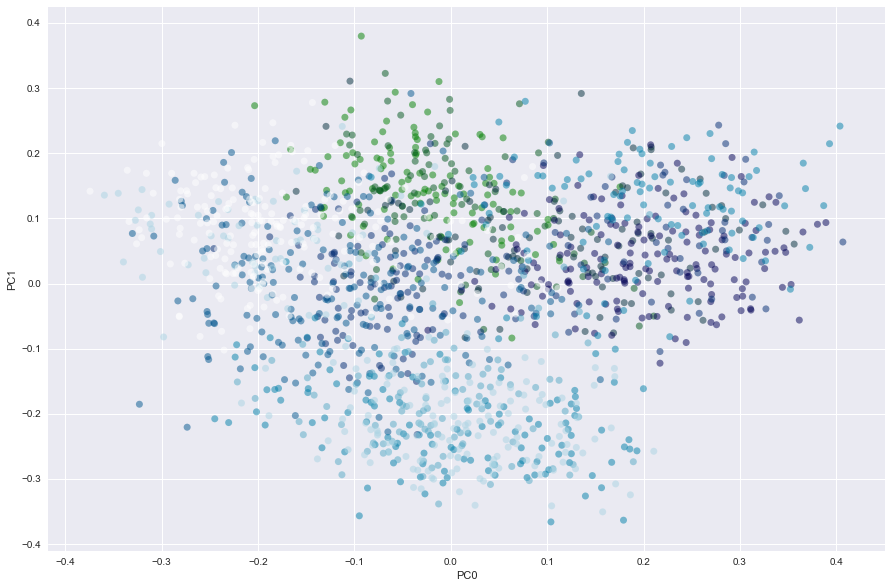

In [43]:
plot_pca(projected, book_ids, 0, 1)
#plot_pca(projected, book_ids, 0, 1, annotate=True)

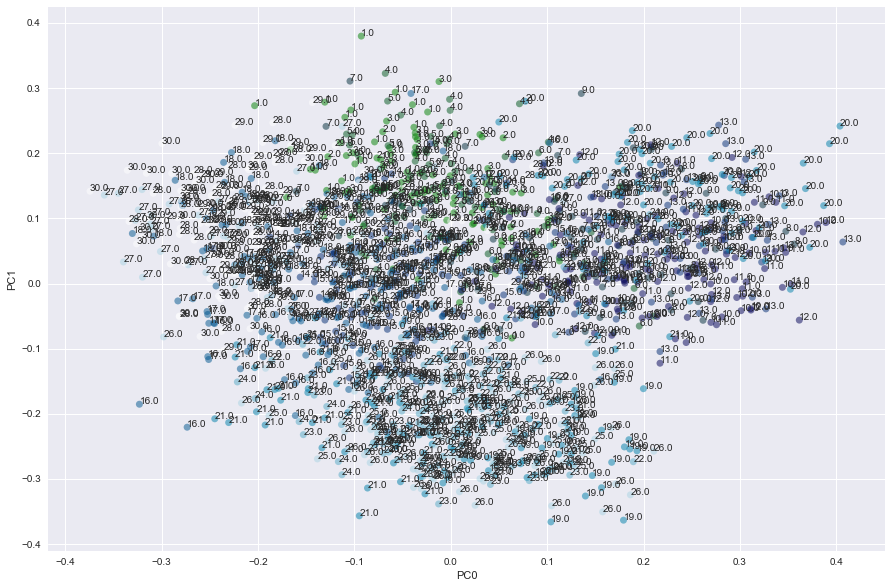

In [44]:
plot_pca(projected, book_ids, 0, 1, annotate=True)

### PC0 vs PC1
### by author id, matplotlib ver

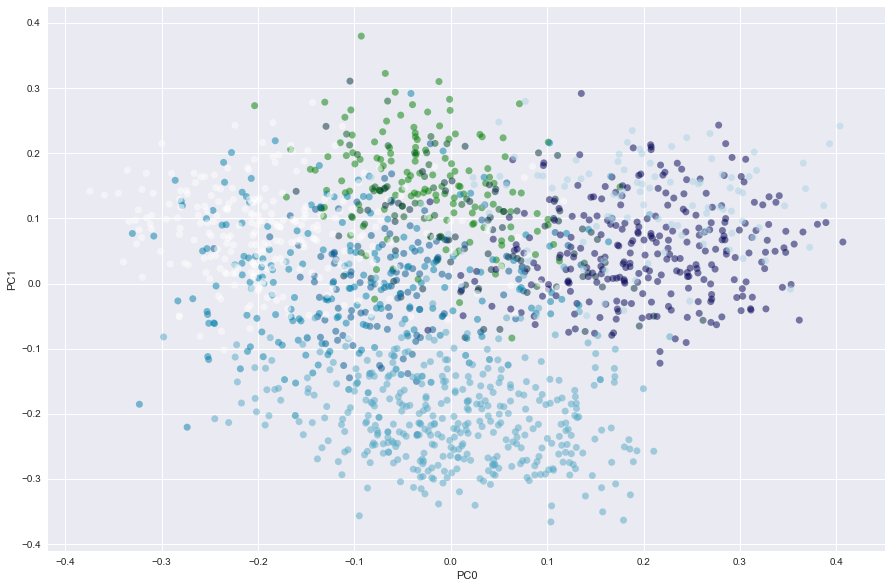

In [45]:
plot_pca(projected, author_ids, 0, 1)

## Next, use plotly to visulize PCAs

### Note to Professor 
The notebook does not display the plotly pca plots directly without running the code. You can find the plots [HERE](https://plot.ly/~eddiezhaor#/ "plotly plots").

### PC0 vs PC1
### by author id, plotly ver

In [53]:
fig = plotly_pca(projected,0,1)
py.iplot(fig, filename='pc0-pc1-author')

### PC1 vs PC2
### by author id

In [52]:
fig = plotly_pca(projected,1,2)
py.iplot(fig, filename='pc1-pc2-author')

### PC2 vs PC3
### by author id

In [54]:
fig = plotly_pca(projected,2,3)
py.iplot(fig, filename='pc2-pc3-author')

### PC0 vs. PC1
### labeled by gender

In [55]:
fig = plotly_pca(projected,0,1,text=gender_ids)
py.iplot(fig, filename='pc0-pc1-gender')

### PC1 vs. PC2
### by gender

In [56]:
fig = plotly_pca(projected,1,2,text=gender_ids)
py.iplot(fig, filename='pc1-pc2-gender')

## View component loadings

We now explore the contribution of specific features (terms) to the components. 

In [57]:
COMPS = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_))
COMPS.columns = ["PC{}".format(i) for i in COMPS.columns]
COMPS.index = vocab_idx

In [58]:
COMPS = COMPS.reset_index().rename(columns={"index":"term_id"})

In [59]:
COMPS.term_id = COMPS.term_id.apply(int)

In [60]:
a = [int(x) for x in vocab_idx.tolist()]

In [61]:
vshort = vocab.loc[a]

In [62]:
vshort.reset_index(inplace=True)

In [63]:
vshort = pd.concat([vshort, COMPS],axis=1)

In [64]:
vshort.shape

(984, 60)

In [65]:
sum(vshort.stop == 1)

0

### PC0 loadings

We note that PC0 clearly distinguishes between Gothic and Detective fiction, but cannot distinguish betwen Poe and Austen, who reside in the middle of the spectrum.

In [66]:
vshort.sort_values('PC0', ascending=False)[['term_str','PC0']]

,term_str,PC0
165,could,0.028348
969,would,0.021791
253,every,0.018782
465,letter,0.014661
406,however,0.014150
860,therefore,0.013820
869,though,0.013597
371,happiness,0.012511
554,must,0.012089
174,cried,0.012062


### PC1 loadings

PC1 does distinguish between Poe and Austen.

In [67]:
vshort.sort_values('PC1', ascending=False)[['term_str','PC1']]

,term_str,PC1
174,cried,0.021197
770,sir,0.015839
476,little,0.014631
253,every,0.010922
570,night,0.010844
212,door,0.010544
268,eyes,0.010321
740,seemed,0.010272
726,saw,0.010165
483,looked,0.010076


### PC2 loadings

In [68]:
vshort.sort_values('PC2', ascending=False)[['term_str','PC2']]

,term_str,PC2
720,said,0.043771
174,cried,0.031245
909,upon,0.019322
496,madam,0.018362
770,sir,0.017276
553,much,0.013471
860,therefore,0.013356
188,dear,0.010328
706,returned,0.010302
406,however,0.009633


In [ ]:
# End